BPSK変調のシミュレーション
===

<img src='./imgsrc/BPSK変調.drawio.png'>

In [27]:
# import
import numpy as np
import matplotlib.pyplot as plt
import sys

np.set_printoptions(precision=4, suppress=True, floatmode="maxprec_equal")
plt.rcParams['figure.figsize'] = (12,4)

In [16]:
# データ生成器

def rndCode(codeSize, Type):
    """
    codeSize: 生成するランダム系列の大きさ（行数ｘ列数）を指定
    Type: タイプ指定 0: [0,1], 1: [-1, 1]
    """
    
    rndCode = np.random.randn(*codeSize)
    
    if rndCode.ndim > 2:
        sys.exit()
    
    dataSize = rndCode.shape
    if len(dataSize) == 1:
        sys.exit()
    
    if Type == 0:
        rndCode = np.where(rndCode <= 0, 0, 1)
    else:
        rndCode = np.where(rndCode <= 0, -1, 1)
    
    return rndCode

In [17]:
# BPSK変調器
def bpskMod(data):
    bpskSymbol = data.copy()
    np.place(bpskSymbol, bpskSymbol == 0, -1)
    
    return bpskSymbol

In [18]:
# 送信機

Ndata = 1024 # データ数
SNRdB = 10 # 雑音比

data = rndCode([Ndata, 1], 0)
bpskSymbol = bpskMod(data)

In [19]:
#　送信データ
data.T

array([[1, 1, 0, ..., 0, 0, 1]])

In [20]:
# ガウス雑音生成

def awgn(Pn, rn, cn):
    """
    Pn: 雑音電力
    ｒｎ: 行数
    cn: 列数
    """
    n = (np.random.randn(rn, cn) + 1j * np.random.randn(rn, cn)) * np.sqrt(Pn / 2)
    
    return n

In [21]:
# 雑音印加
NSymbol = len(bpskSymbol)
Pn = 10**(-SNRdB/10)
rSig = bpskSymbol + awgn(Pn, NSymbol, 1)

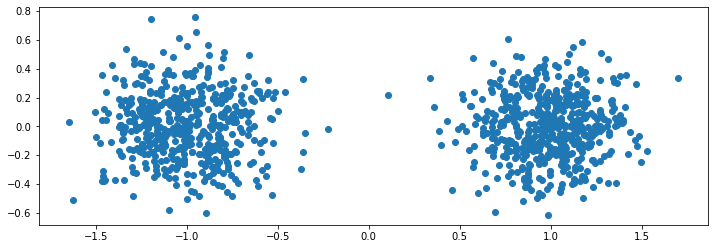

In [30]:
# IQデータの散布図
plt.scatter(rSig.real, rSig.imag)

In [22]:
# BPSK復調器
def bpskDem(rSig):
    """
    rSig : 受信信号
    rData:　受信データ
    """
    rData = np.ones(rSig.shape)
    rData[rSig < 0] =  0
    
    return rData

In [23]:
# 受信機
rData = bpskDem(rSig)

In [24]:
# 受信データ
ｒＤａｔａ.T

array([[1., 1., 0., ..., 0., 0., 1.]])

In [25]:
# BER比較器
def ber(data1, data2):
    BER = np.sum(np.abs(data1-data2))/data1.size
    return BER

In [26]:
# ビットエラーレート（BER）の測定
ber(data, rData)

0.0